<a href="https://colab.research.google.com/github/AI4Finance-Foundation/FinRL/blob/master/tutorials/3-Practical/FinRL_PaperTrading_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from finrl.train import train
from finrl.test import test
from finrl.config_tickers import DOW_30_TICKER
from finrl.config import INDICATORS
from finrl.meta.env_stock_trading.env_stocktrading_np import StockTradingEnv
from finrl.meta.env_stock_trading.env_stock_papertrading import AlpacaPaperTrading
from finrl.meta.data_processor import DataProcessor
from finrl.plot import backtest_stats, backtest_plot, get_daily_return, get_baseline
from common import *

import numpy as np
import pandas as pd

/home/zihan/anaconda3/envs/x/lib/python3.7/site-packages/pyfolio/pos.py:27: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; multipliers will not be applied'


In [2]:
ticker_list = DOW_30_TICKER
action_dim = len(DOW_30_TICKER)
candle_time_interval = '1Min'  # '1Min'

env = StockTradingEnv

start_date = '2019-1-1'
end_date = '2022-1-1'

In [3]:
account_value = test(start_date = start_date, 
      end_date = end_date,
      ticker_list = ticker_list, 
      data_source = 'alpaca',
      time_interval= candle_time_interval, 
      technical_indicator_list= INDICATORS,
      drl_lib='elegantrl', 
      env=env,
      model_name='ppo', 
      API_KEY = API_KEY, 
      API_SECRET = API_SECRET, 
      API_BASE_URL = API_BASE_URL,
#       erl_params=ERL_PARAMS,
      cwd='./papertrading_erl', #current_working_dir
      if_plot=True, # to return a dataframe for backtest_plot
      break_step=1e7)

Alpaca successfully connected
Load data from data/alpaca_2019-1-1_2022-1-1.pkl
The data looks like: 
                    timestamp    open    high     low   close  volume   tic  \
0  2019-01-02 09:30:00-05:00  154.60  154.60  154.59  154.59  1140.0  AAPL   
1  2019-01-02 09:30:00-05:00  190.64  190.64  190.64  190.64     0.0  AMGN   
2  2019-01-02 09:30:00-05:00   93.59   93.59   93.59   93.59     0.0   AXP   
3  2019-01-02 09:30:00-05:00  315.70  315.70  315.70  315.70     0.0    BA   
4  2019-01-02 09:30:00-05:00  124.26  124.26  124.26  124.26     0.0   CAT   
5  2019-01-02 09:30:00-05:00  133.50  133.50  133.50  133.50   100.0   CRM   
6  2019-01-02 09:30:00-05:00   42.25   42.25   42.25   42.25     0.0  CSCO   
7  2019-01-02 09:30:00-05:00  107.34  107.34  107.34  107.34     0.0   CVX   
8  2019-01-02 09:30:00-05:00  108.30  108.30  108.30  108.30     0.0   DIS   
9  2019-01-02 09:30:00-05:00   55.00   55.00   55.00   55.00     0.0   DOW   
10 2019-01-02 09:30:00-05:00  164.44  16

/home/zihan/research/FinRL/finrl/agents/elegantrl/models.py:110: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:204.)
  s_tensor = _torch.as_tensor((state,), device=device)


Test Finished!
episode_return 1.1422668204437831


In [4]:
#baseline stats
print("==============Get Baseline Stats===========")
baseline_df = get_baseline(
        ticker="^DJI", 
        start = start_date,
        end = end_date)

stats = backtest_stats(baseline_df, value_col_name = 'close')

==============Get Baseline Stats===========
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (757, 8)
Annual return          0.158683
Cumulative returns     0.556495
Annual volatility      0.235330
Sharpe ratio           0.745366
Calmar ratio           0.427876
Stability              0.681806
Max drawdown          -0.370862
Omega ratio            1.176766
Sortino ratio          1.031344
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.944948
Daily value at risk   -0.028953
dtype: float64


/home/zihan/anaconda3/envs/x/lib/python3.7/site-packages/pyfolio/timeseries.py:724: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


==============Compare to DJIA===========
date 757
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (757, 8)


/home/zihan/anaconda3/envs/x/lib/python3.7/site-packages/pyfolio/timeseries.py:724: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


Start date,2019-01-02
End date,2021-12-31
Total months,36
,Backtest
Annual return,3.915%
Cumulative returns,12.229%
Annual volatility,52.344%
Sharpe ratio,0.53
Calmar ratio,0.05
Stability,0.19
Max drawdown,-77.267%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,77.27,2020-08-26,2020-09-23,NaT,NaN
1,32.46,2020-01-29,2020-03-23,2020-06-05,93
2,16.41,2019-05-03,2019-06-03,2019-07-31,64
3,8.38,2019-07-31,2019-08-05,2019-09-09,29
4,5.64,2019-01-02,2019-01-03,2019-01-09,6


/home/zihan/anaconda3/envs/x/lib/python3.7/site-packages/pyfolio/plotting.py:805: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
/home/zihan/anaconda3/envs/x/lib/python3.7/site-packages/pyfolio/plotting.py:805: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
/home/zihan/anaconda3/envs/x/lib/python3.7/site-packages/pyfolio/plotting.py:805: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
/home/zihan/anaconda3/envs/x/lib/python3.7/site-packages/pyfolio/timeseries.py:541: DeprecationWarning: The default dtype for empty Series will be 'object

Stress Events,mean,min,max
New Normal,0.11%,-72.39%,12.00%


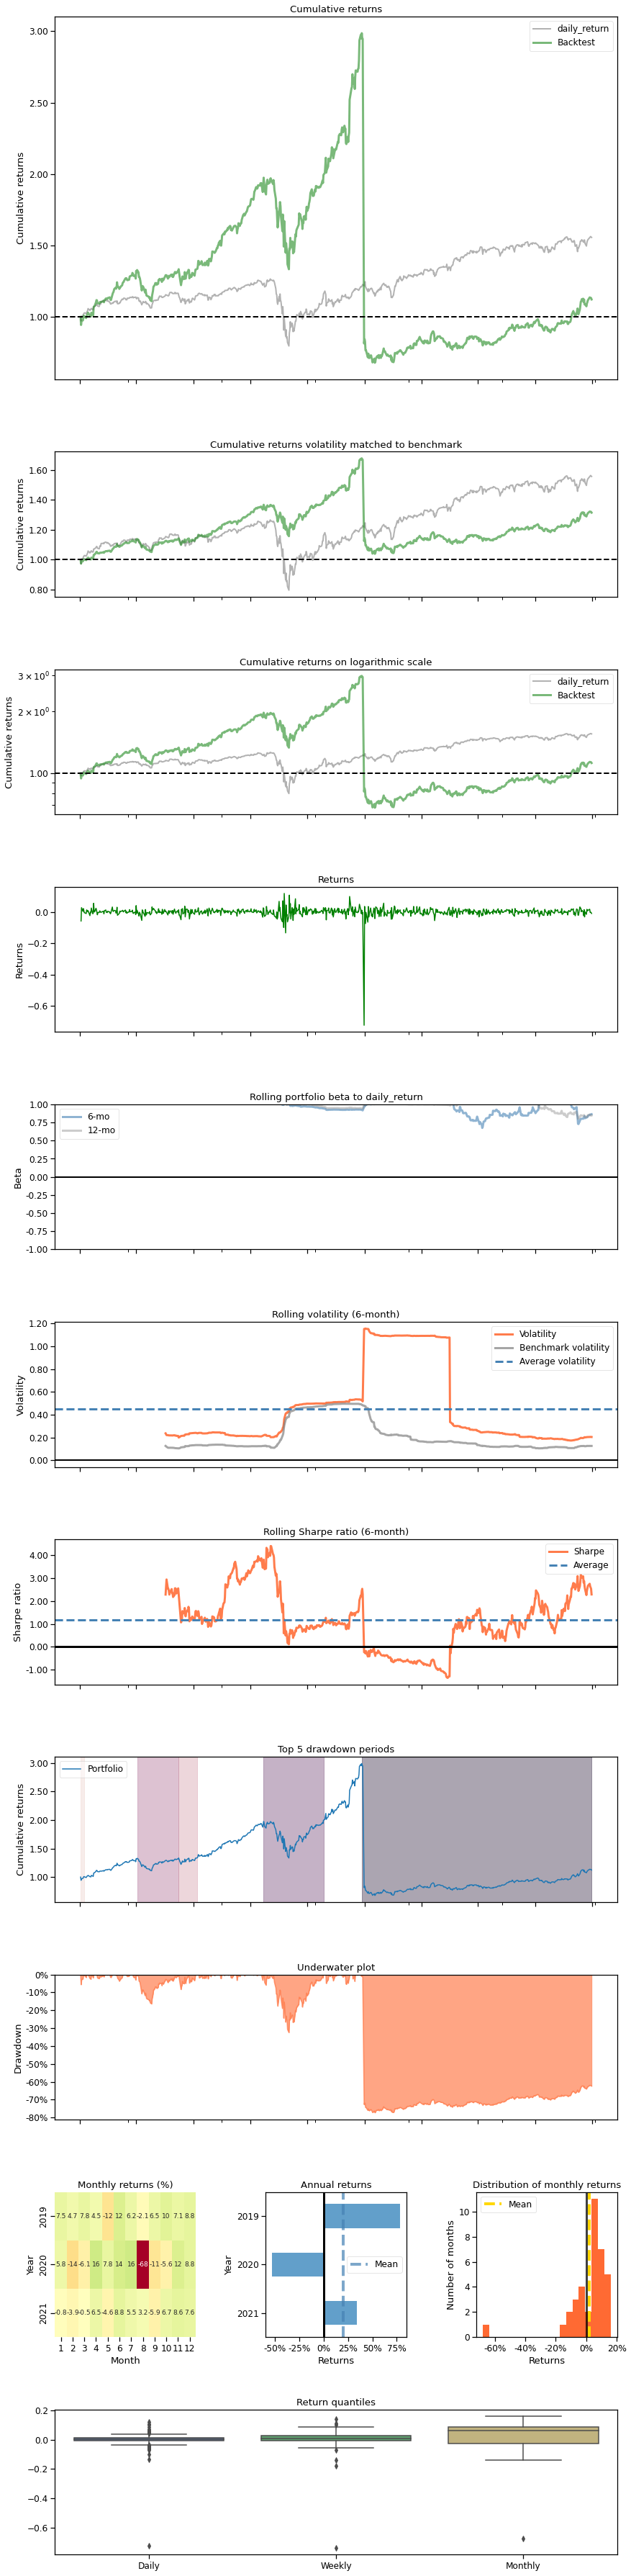

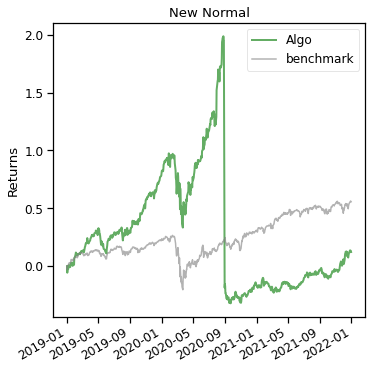

In [5]:
print("==============Compare to DJIA===========")
%matplotlib inline
# S&P 500: ^GSPC
# Dow Jones Index: ^DJI
# NASDAQ 100: ^NDX
backtest_plot(account_value, 
             baseline_ticker = '^DJI', 
             baseline_start = start_date,
             baseline_end = end_date)